In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import networkx as nx
import scipy
import itertools

In [7]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\2020-04-20-2023-04-20.csv"
df = pd.read_csv(file)

In [9]:
df = df.loc[df["region"] == "Eastern Africa"]

In [8]:
df.groupby(["region"])["fatalities"].sum()

region
Antarctica                       0
Caribbean                     4685
Caucasus and Central Asia    80151
Central America               5033
East Asia                      122
Eastern Africa               50500
Europe                       51959
Middle Africa                27297
Middle East                  71602
North America                24389
Northern Africa               6878
Oceania                        401
South America                28424
South Asia                    8497
Southeast Asia               39317
Southern Africa               1046
Western Africa               55040
Name: fatalities, dtype: int64

In [10]:
v= df["event_date"]
v=v.values
dt = [datetime.strptime(v[i], "%d %B %Y") for i in range(len(v))]
q=[]

for i in range(len(dt)):
    q.append(datetime.timestamp(dt[i]))
    
df.insert(loc=3, column='date_timestamp', value=q)
df = df.sort_values("date_timestamp")

In [11]:
dk=df.groupby(["country"])["fatalities"].sum()
country = dk[dk>0].index.tolist()
#dk

In [12]:
vec_df =[]
for c in country:
    df2 = df.copy()
    df2.loc[df2["country"] != c, df2.columns != "date_timestamp"] = 0
    vec_df.append(df2)

In [13]:
G = nx.Graph()
time_series=[]
res = {i: country[i] for i in range(len(country))}

for i in range(len(country)):
    G.add_node(i)
    index= vec_df[i].groupby("date_timestamp").count()["event_id_cnty"].index.values.tolist() 
    numb= vec_df[i].groupby("date_timestamp")["fatalities"].sum().to_list()
    vec_t=[index,numb]
    time_series.append(np.transpose(vec_t))
       
nx.set_node_attributes(G,{ n: time_series[n] for n in G.nodes() },'ts')
nx.set_node_attributes(G,{ n: res[n] for n in G.nodes() },'country')

edges = {(u,v): abs(scipy.stats.pearsonr(time_series[u][:,1].tolist(), time_series[v][:,1].tolist())[0]) 
         for u,v in itertools.combinations(range(len(country)), 2) 
         if abs(scipy.stats.pearsonr(time_series[u][:,1].tolist(), time_series[v][:,1].tolist())[0])>0.05}
G.add_edges_from(edges)
nx.set_edge_attributes(G, values = edges, name = 'weight')

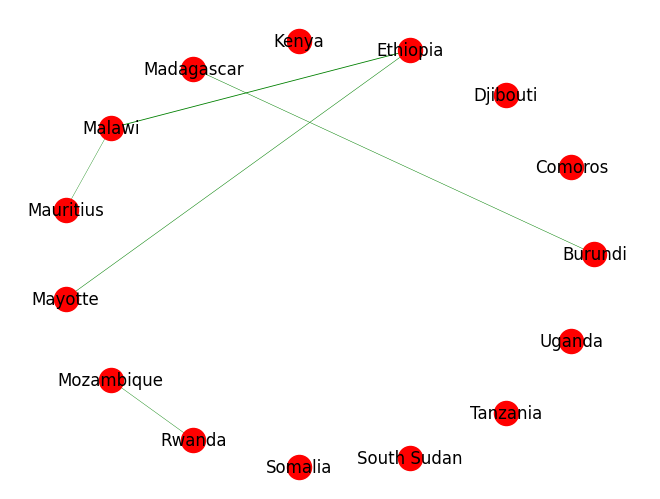

In [14]:
weight=nx.get_edge_attributes(G, "weight").values()
nx.draw(G, nx.circular_layout(G), width=[list(weight)[i]*5 for i in range(len(list(weight)))], edge_color="g",node_color="r", labels=res)
plt.show()

In [15]:
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)

{0: 0.07142857142857142, 1: 0.0, 2: 0.0, 3: 0.14285714285714285, 4: 0.0, 5: 0.07142857142857142, 6: 0.14285714285714285, 7: 0.07142857142857142, 8: 0.07142857142857142, 9: 0.07142857142857142, 10: 0.07142857142857142, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0}
